# Embeddings with the Schelling Model

A series of experiements with using embeddings to define agents in a simple schelling model.

See [schelling_embeddings2.py](schelling_embeddings2.py) for the Schelling model code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Import the SchellingModel from your existing code file
from schelling_embeddings2 import household_descriptions
from schelling_embeddings2 import SchellingModel

## Household Embedding similarity

Explore the embeddings

These are the household descriptions:

In [2]:
pd.DataFrame(household_descriptions)

,0
0,"A dual-income, child-free couple in their 30s ..."
1,A single mother of two in a rented flat works ...
2,A student house-share of four undergraduates l...
3,"A middle-aged, married couple with three teena..."
4,A cohabiting same-sex couple in their 40s livi...
5,"A large, multi-generational family shares a te..."
6,A young single professional in a high-rise fla...
7,"A rural, self-employed farming couple with no ..."
8,A divorced father living part-time with his ki...
9,"A dual-income, couple without children in thei..."


Look at the similarity of the household embeddings.


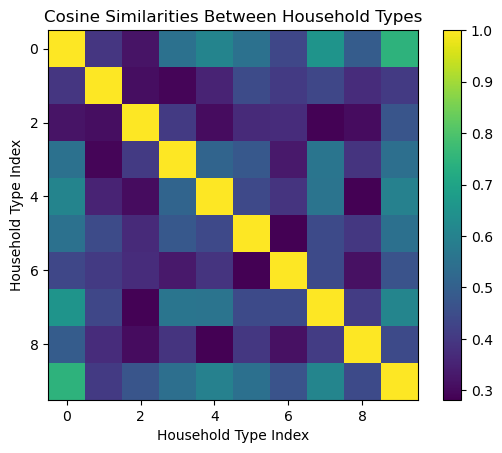

In [3]:
# Create a minimal model instance. Set grid_size=1, num_agents=1, max_iters=0
# so it doesn't run the main loop, but still loads embeddings.
model = SchellingModel(
    descriptions=household_descriptions,
    grid_size=1,
    num_agents=1,
    similarity_threshold=0.85,
    max_iters=0
)

# Retrieve the 10 household embeddings from the model
embeddings = model.description_embeddings

# Compute the 10×10 similarity matrix
sim_matrix = cosine_similarity(embeddings)

# Plot the similarity matrix
plt.imshow(sim_matrix)  # By default uses a color scale
plt.colorbar()
plt.title("Cosine Similarities Between Household Types")
plt.xlabel("Household Type Index")
plt.ylabel("Household Type Index")
plt.show()

Show the most- and least-similar pairs of households

In [4]:
# Create a list of (type_i, type_j, similarity) for all unique pairs
pairs = []
for i in range(len(household_descriptions)):
    for j in range(i+1, len(household_descriptions)):
        pairs.append((i, j, sim_matrix[i][j]))

# Sort by similarity
pairs.sort(key=lambda x: x[2], reverse=True)

# Take the top 5 most similar
top_5 = pairs[:5]
# Take the bottom 5 least similar
bottom_5 = pairs[-5:]

# Convert to DataFrame
columns = ["Type1 Index", "Type2 Index", "Similarity", "Type1 Description", "Type2 Description"]
rows = []
for (i, j, sim) in top_5:
    rows.append((i, j, sim, household_descriptions[i], household_descriptions[j]))
for (i, j, sim) in bottom_5:
    rows.append((i, j, sim, household_descriptions[i], household_descriptions[j]))

df = pd.DataFrame(rows, columns=columns)

# Show the table
df

,Type1 Index,Type2 Index,Similarity,Type1 Description,Type2 Description
0,0,9,0.745050,"A dual-income, child-free couple in their 30s ...","A dual-income, couple without children in thei..."
1,0,7,0.653798,"A dual-income, child-free couple in their 30s ...","A rural, self-employed farming couple with no ..."
2,7,9,0.608904,"A rural, self-employed farming couple with no ...","A dual-income, couple without children in thei..."
3,0,4,0.605440,"A dual-income, child-free couple in their 30s ...",A cohabiting same-sex couple in their 40s livi...
4,4,9,0.598501,A cohabiting same-sex couple in their 40s livi...,"A dual-income, couple without children in thei..."
5,2,4,0.304252,A student house-share of four undergraduates l...,A cohabiting same-sex couple in their 40s livi...
6,1,3,0.292134,A single mother of two in a rented flat works ...,"A middle-aged, married couple with three teena..."
7,2,7,0.285348,A student house-share of four undergraduates l...,"A rural, self-employed farming couple with no ..."
8,4,8,0.283337,A cohabiting same-sex couple in their 40s livi...,A divorced father living part-time with his ki...
9,5,6,0.281801,"A large, multi-generational family shares a te...",A young single professional in a high-rise fla...


## Agent locations

Visualise the changing locations of the agents

Iteration 0: 132 happy agents
Iteration 1: 159 happy agents
Iteration 2: 165 happy agents
Iteration 3: 190 happy agents
Iteration 4: 204 happy agents
Iteration 5: 218 happy agents
Iteration 6: 237 happy agents
Iteration 7: 249 happy agents
Iteration 8: 252 happy agents
Iteration 9: 255 happy agents
Iteration 10: 264 happy agents
Iteration 11: 269 happy agents
Iteration 12: 274 happy agents
Iteration 13: 279 happy agents
Iteration 14: 283 happy agents
Iteration 15: 284 happy agents
Iteration 16: 285 happy agents
Iteration 17: 289 happy agents
Iteration 18: 285 happy agents
Iteration 19: 288 happy agents
Iteration 20: 291 happy agents
Iteration 21: 290 happy agents
Iteration 22: 291 happy agents
Iteration 23: 292 happy agents
Iteration 24: 293 happy agents
Iteration 25: 294 happy agents
Iteration 26: 295 happy agents
Iteration 27: 295 happy agents
Iteration 28: 296 happy agents
Iteration 29: 297 happy agents


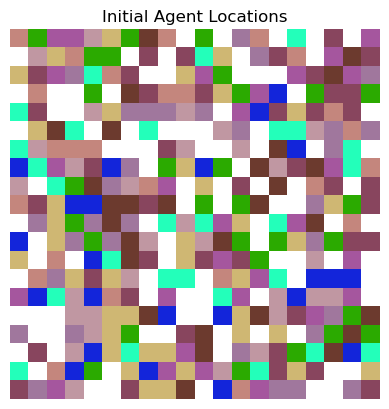

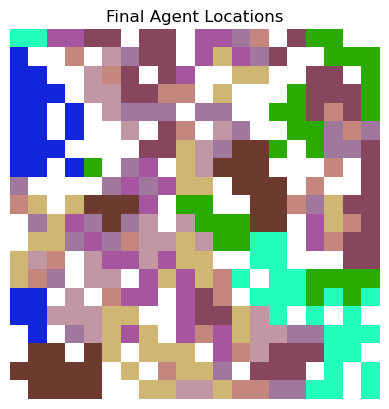

In [7]:

# --- Step 2: Create and run the model
model = SchellingModel(household_descriptions,
                           grid_size=20,
                           num_agents=300,
                           similarity_threshold=0.53,
                           max_iters=30)

# Save initial positions before running the simulation
initial_positions = [(agent.pos, agent.desc_idx) for agent in model.agents]

# Run the simulation (updates agent positions)
model.run(do_plots=False)

# Save final positions
final_positions = [(agent.pos, agent.desc_idx) for agent in model.agents]

# --- Step 3: Plotting function
def plot_agent_positions(agent_data, title, rgb_map, grid_size=20):
    img = np.ones((grid_size, grid_size, 3))  # white background
    for (x, y), desc_idx in agent_data:
        rgb = rgb_map[desc_idx]
        scaled = (rgb - rgb_map.min()) / (rgb_map.max() - rgb_map.min())
        img[x, y] = scaled
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# --- Step 4: Show both grids
plot_agent_positions(initial_positions, "Initial Agent Locations", model.rgb_map)
plot_agent_positions(final_positions, "Final Agent Locations", model.rgb_map)